In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Load data
data = pd.read_csv(r"CLEAN_DATA\Europe_2015_manifesto_gini_ps.csv")

# Drop the rows that have missing values
data.dropna(subset=['Gini coefficient'], inplace=True)
col_todrop = ['Unnamed: 0.1', 'Unnamed: 0', 'eumember', 'date', 'coderid', 'manual', 'coderyear', 'testresult', 'testeditsim', 'planeco', 'welfare', 'total']
data = data.drop(columns=col_todrop)

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# One-hot encode the 'countryname' column
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
country_encoded = onehot_encoder.fit_transform(data[['countryname']])

# Convert the encoded array to a DataFrame
country_encoded_df = pd.DataFrame(country_encoded, columns=onehot_encoder.get_feature_names_out(['countryname']))

# Concatenate the numerical columns with the one-hot encoded 'countryname' column
data_processed = pd.concat([data[numerical_columns], country_encoded_df], axis=1)

# Create a new DataFrame containing all columns
X = data_processed.copy()

display(X)


C:\Users\Vincent\AppData\Local\Temp\ipykernel_19660\3993106694.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"CLEAN_DATA\Europe_2015_manifesto_gini_ps.csv")
c:\Users\Vincent\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country,oecdmember,party,parfam,pervote,voteest,presvote,absseat,totseats,progtype,...,countryname_South Africa,countryname_South Korea,countryname_Spain,countryname_Sweden,countryname_Switzerland,countryname_Turkey,countryname_Ukraine,countryname_United Kingdom,countryname_United States,countryname_Uruguay
99,11.0,10.0,11110.0,10.0,4.646,0.0,NaN,17.0,349.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,11.0,10.0,11220.0,20.0,8.388,0.0,NaN,30.0,349.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,11.0,10.0,11320.0,30.0,39.854,0.0,NaN,144.0,349.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,11.0,10.0,11420.0,40.0,13.394,0.0,NaN,48.0,349.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,11.0,10.0,11520.0,50.0,9.150,0.0,NaN,33.0,349.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


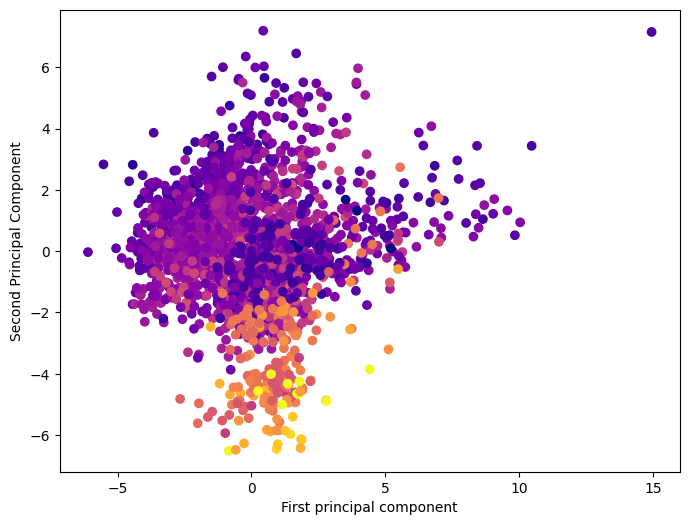

(3420, 217)
(3420, 100)


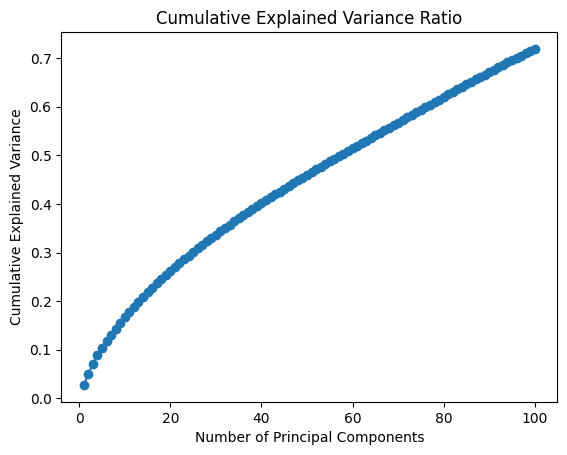

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,Gini coefficient
0,-4.061894,2.480144,2.507687,-0.683093,-0.516598,-1.232196,0.489979,-0.239474,-0.308444,-1.198016,...,0.337177,0.509690,0.078080,-0.147125,0.764412,0.282755,0.383362,-0.713436,-0.335305,0.257998
1,-3.676689,2.092705,2.387680,-0.856809,-1.051473,-1.185254,1.691941,-0.072192,0.139714,-0.453631,...,-0.766324,-0.184622,-0.278208,-0.121823,0.408274,0.469600,0.726640,-1.265269,0.001715,0.257998
2,-1.941901,1.878776,-0.316567,-1.845180,-1.232889,-2.577168,1.068687,-0.210122,0.163342,-0.944738,...,-0.414407,0.216208,-0.296258,0.474008,0.291879,-0.161979,0.099281,-0.542173,0.063755,0.257998
3,-1.211961,3.126699,-0.480840,-1.635779,-1.487181,-0.831477,-0.358455,0.485534,-0.443012,-0.118769,...,-0.606952,0.053359,-0.225331,0.582799,0.486663,-0.171017,-0.151964,-0.602893,-0.130982,0.257998
4,-1.176980,3.123774,-0.468435,-0.891548,0.132405,-0.646110,-0.398557,0.410165,0.302427,-0.268563,...,-0.110502,-0.033124,0.146047,-0.506761,0.370518,0.025812,-0.054115,-0.009123,0.248542,0.257998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,0.206880,0.290971,-0.229650,0.134219,-0.381983,0.319907,-0.273339,0.043323,-0.186180,0.361625,...,-0.866010,0.403329,1.218264,-1.404011,-0.902010,-0.040474,-0.309082,0.988249,-0.198727,NaN
3416,0.206880,0.290971,-0.229650,0.134219,-0.381983,0.319907,-0.273339,0.043323,-0.186180,0.361625,...,-0.866010,0.403329,1.218264,-1.404011,-0.902010,-0.040474,-0.309082,0.988249,-0.198727,NaN
3417,0.206880,0.290971,-0.229650,0.134219,-0.381983,0.319907,-0.273339,0.043323,-0.186180,0.361625,...,-0.866010,0.403329,1.218264,-1.404011,-0.902010,-0.040474,-0.309082,0.988249,-0.198727,NaN
3418,0.206880,0.290971,-0.229650,0.134219,-0.381983,0.319907,-0.273339,0.043323,-0.186180,0.361625,...,-0.866010,0.403329,1.218264,-1.404011,-0.902010,-0.040474,-0.309082,0.988249,-0.198727,NaN


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Fit PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_imputed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=X['Gini coefficient'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

print(X_imputed.shape)
print(X_pca.shape)

# Access explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()
n_components_to_retain = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

# Fit PCA again with the determined number of components
pca_final = PCA(n_components=n_components_to_retain)
X_pca_final = pca_final.fit_transform(X_imputed)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components_to_retain + 1)]
pc_df = pd.DataFrame(data=X_pca_final, columns=pc_columns)

# target variable
y = data['Gini coefficient']

# Concatenate the principal components with the target variable
result_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

display(result_df)


,Gini coefficient
PC4,0.192707
PC10,0.104008
PC13,0.093035
PC11,0.072471
PC1,0.063593
...,...
PC8,-0.084391
PC5,-0.088216
PC12,-0.089720
PC19,-0.106299


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
country,0.214856,-0.336222,-0.019718,0.127995,-0.056736,-0.022826,-0.074887,-0.029656,0.008620,0.040714,...,-0.021117,-0.007019,-0.024330,-0.006012,0.017279,-0.006774,0.012960,-0.022814,-0.011069,0.029573
oecdmember,-0.257585,0.217122,-0.070503,-0.076992,-0.036637,0.010263,0.085202,-0.048789,-0.031846,0.045306,...,0.002390,-0.049406,-0.040382,-0.050820,0.075556,0.007372,0.040614,-0.039995,-0.050902,0.023185
party,0.215524,-0.335826,-0.020135,0.127991,-0.056718,-0.022822,-0.075167,-0.029032,0.008686,0.040892,...,-0.021474,-0.006886,-0.024103,-0.006018,0.017227,-0.006654,0.013070,-0.022958,-0.010969,0.029709
parfam,0.069934,-0.024802,-0.054790,0.041792,-0.018278,0.034071,-0.031662,0.057851,-0.013832,0.043727,...,-0.131227,0.037265,0.144973,-0.044256,-0.123109,0.071162,0.060005,0.049004,0.083796,-0.022988
pervote,0.065913,-0.008749,-0.126321,-0.037888,-0.159538,-0.222221,0.159025,-0.104820,0.029455,-0.054253,...,0.033529,0.012728,0.105695,0.037826,-0.038648,0.064128,-0.050488,0.063531,0.030061,0.017429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
countryname_Turkey,0.015441,-0.014681,0.001606,0.007746,-0.003498,-0.007459,-0.004167,0.001890,0.003727,-0.002843,...,-0.149280,0.012895,0.247352,0.002329,0.053663,-0.090215,-0.084739,-0.052958,-0.069026,0.009015
countryname_Ukraine,0.016994,-0.016201,0.001789,0.008508,-0.003385,-0.008119,-0.004553,0.000690,0.004334,-0.002297,...,0.030632,0.202906,0.018139,-0.146822,-0.096617,-0.028567,0.043927,-0.029165,-0.044689,0.109650
countryname_United Kingdom,0.025612,-0.024416,0.002645,0.012896,-0.005308,-0.012299,-0.006882,0.002646,0.006395,-0.004476,...,0.027454,-0.006426,0.087199,0.046051,0.046223,-0.071734,0.023787,0.018737,-0.096881,0.013035
countryname_United States,-0.032228,0.031426,0.006764,-0.023913,0.031172,-0.001695,-0.018564,0.012453,0.024033,0.056083,...,-0.025919,-0.158830,0.029136,-0.002921,0.013896,-0.039120,-0.083236,0.090935,-0.016514,-0.028925


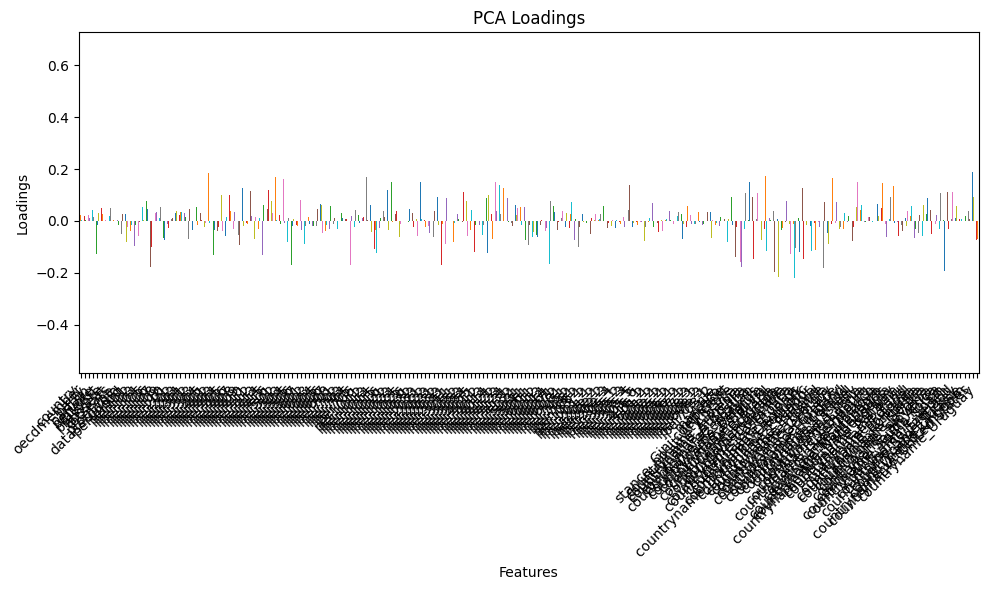

In [109]:
loadings = pca.components_

# Transpose the loadings array
loadings_transposed = loadings.T

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(loadings_transposed, columns=[f'PC{i}' for i in range(1, loadings_transposed.shape[1] + 1)], index=X.columns)

# Filter the DataFrame to include only the Principal Component and Correlation with Target columns
result_df = loadings_df.loc['Gini coefficient']

gini_loadings_df = pd.DataFrame(result_df)

gini_loadings_df = gini_loadings_df.sort_values(by='Gini coefficient', ascending=False)

display(gini_loadings_df)

# Display the loadings
display(loadings_df)

# Optionally, visualize the loadings
plt.figure(figsize=(10, 6))
plt.title('PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Loadings')
loadings_df.plot(kind='bar', ax=plt.gca(), legend=None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

